/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


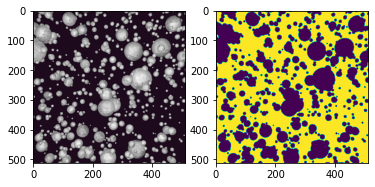

In [12]:
import numpy as np 
import pandas as pd
from pathlib import Path
from torch.utils.data import Dataset, DataLoader, sampler
from torchvision import transforms, datasets, models
from torchvision.transforms import ToTensor
from PIL import Image
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
import time
import pathlib
from pathlib import Path
from torch import nn
import cv2
import numpy as np
import time
from IPython.display import clear_output
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
from torchvision import models
import math


from models import UNET, ClassifierNet

###################################################################################################################
################----Define Paths for GB training data, and set up DataLoaders for prediction----###################
###################################################################################################################

#Define transpose for grayscale classifier network
trans_class = transforms.Compose(
    [transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))])


###################################################################################################################
###############################----Define if device for GPU (cuda) or CPU----######################################
###################################################################################################################
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

###################################################################################################################
########################----Define Model for Classifier CNN, and Load pretrained weights----#######################
###################################################################################################################

class_model = ClassifierNet().to(device)
ClassPATH = './Pretrained_weights/latest_pore_or_grain_net.pth'

#Enable this line if for CPU use instead of GPU
#class_model.load_state_dict(torch.load(ClassPATH, map_location=torch.device('cpu')))
class_model.load_state_dict(torch.load(ClassPATH))

###################################################################################################################
#######################----Define Model for RGB Segmentation, and Load pretrained weights----######################
###################################################################################################################
  

segment_model = UNET(3,2)
segmentPath = './Pretrained_weights/simple_unet_weights.pt'

segment_model.load_state_dict(torch.load(segmentPath))

def predb_to_mask(predb, idx):
    p = torch.functional.F.softmax(predb[idx], 0)
    return p.argmax(0).cpu()


img_o = np.array(Image.open('401.png'))
img_o = cv2.cvtColor(img_o, cv2.COLOR_RGBA2RGB)
img = ToTensor()(img_o).unsqueeze(0) # unsqueeze
img = Variable(img)

x1 = torch.tensor(img, dtype=torch.float32)

with torch.no_grad():
    pred22 = segment_model(x1)


plt.subplot(121)
plt.imshow(img_o)
plt.subplot(122)
plt.imshow(predb_to_mask(pred22, 0))
plt.show()


###################################################################################################################
###################################################################################################################
###################################################################################################################

### Note that the YOLOv5 is not included in this Notebook due to Copyright.

But if you follow the guide in the instructions you can find the steps needed to replicate the complete Framework (Pores/Particles and Grain Boundaries).

The following images were obtained using the steps for the YOLOv5 Network to demonstrate the complete output.

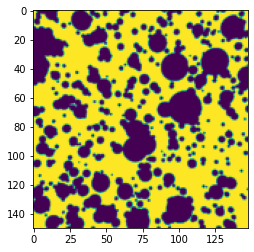

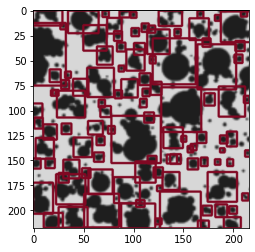

In [15]:
plt.figure()
img_in = cv2.imread('1.png')
img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
plt.imshow(img_in)

plt.figure()
img_out = cv2.imread('1_results.png')
plt.imshow(img_out)